In [1]:
import pandas as pd
import numpy as np
import json

In [3]:
# Data Preprocessing & NLP
import nltk
import re
import string
import gensim
from textblob import Word

In [4]:
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sdeshpande/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sdeshpande/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.pairwise import linear_kernel

In [7]:
# Performance metrics
from surprise import SVD
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity

In [9]:
# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
sns.set()
%matplotlib inline

In [10]:
import warnings
warnings.filterwarnings('ignore')

https://www.kaggle.com/Cornell-University/arxiv

https://github.com/alpercakr/NLP-Classification-Recommendation-Project/blob/master/arxiv-nlp.ipynb

In [12]:
# file type trasformation: json to csv
df = pd.read_json('/Users/sdeshpande/Desktop/text_based_scripts_and_data/arxiv-metadata-oai-snapshot-2020-08-14.json', lines = True)
df.to_csv('/Users/sdeshpande/Desktop/text_based_scripts_and_data/arxivData.csv', index='id')

In [33]:
arxivData = pd.read_csv('arxivData.csv')

In [34]:
arxivData.columns

Index(['Unnamed: 0', 'id', 'submitter', 'authors', 'title', 'comments',
       'journal-ref', 'doi', 'report-no', 'categories', 'license', 'abstract',
       'versions', 'update_date', 'authors_parsed'],
      dtype='object')

In [35]:
#dropping irrelevant columns
columns_to_delete = ['Unnamed: 0', 'id']
arxivData.drop(columns_to_delete, inplace=True, axis=1)

In [36]:
arxivData.head()

,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,NaN,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[['Balázs', 'C.', ''], ['Berger', 'E. L.', '']..."
1,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,NaN,NaN,NaN,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[['Streinu', 'Ileana', ''], ['Theran', 'Louis'..."
2,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",NaN,NaN,NaN,physics.gen-ph,NaN,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[['Pan', 'Hongjun', '']]"
3,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,NaN,NaN,NaN,math.CO,NaN,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[['Callan', 'David', '']]"
4,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,NaN,"Illinois J. Math. 52 (2008) no.2, 681-689",NaN,NaN,math.CA math.FA,NaN,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[['Abu-Shammala', 'Wael', ''], ['Torchinsky', ..."


In [37]:
arxivData_f = arxivData[['authors_parsed','title','categories','abstract']]

In [38]:
arxivData_f.head()

,authors_parsed,title,categories,abstract
0,"[['Balázs', 'C.', ''], ['Berger', 'E. L.', '']...",Calculation of prompt diphoton production cros...,hep-ph,A fully differential calculation in perturba...
1,"[['Streinu', 'Ileana', ''], ['Theran', 'Louis'...",Sparsity-certifying Graph Decompositions,math.CO cs.CG,"We describe a new algorithm, the $(k,\ell)$-..."
2,"[['Pan', 'Hongjun', '']]",The evolution of the Earth-Moon system based o...,physics.gen-ph,The evolution of Earth-Moon system is descri...
3,"[['Callan', 'David', '']]",A determinant of Stirling cycle numbers counts...,math.CO,We show that a determinant of Stirling cycle...
4,"[['Abu-Shammala', 'Wael', ''], ['Torchinsky', ...",From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,math.CA math.FA,In this paper we show how to compute the $\L...


In [41]:
arxivData_f.count()

authors_parsed    1747307
title             1747307
categories        1747307
abstract          1747307
dtype: int64

In [40]:
arxivData_f['authors_parsed'] = arxivData_f['authors_parsed'].apply(literal_eval)

In [139]:
arxivData_f_s = arxivData_f.iloc[:100000, :]

In [140]:
arxivData_f_s.count()

authors_parsed    100000
title             100000
categories        100000
abstract          100000
dtype: int64

In [141]:
# Data Cleaning
def clean_text(text):
    # remove everything except alphabets
    text = re.sub("[^a-zA-Z]", " ", text)
    # remove whitespaces
    text = ' '.join(text.split())
    text = text.lower()
    
    return text

In [142]:
# creating clean text feature
features = ['title', 'abstract']
for feature in features:
    arxivData_f_s['clean_' + feature] = arxivData_f_s[feature].apply(clean_text)

In [143]:
arxivData_f_s.head()

,authors_parsed,title,categories,abstract,clean_title,clean_abstract
0,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,...",Calculation of prompt diphoton production cros...,[hep-ph],A fully differential calculation in perturba...,calculation of prompt diphoton production cros...,a fully differential calculation in perturbati...
1,"[[Streinu, Ileana, ], [Theran, Louis, ]]",Sparsity-certifying Graph Decompositions,"[math.CO, cs.CG]","We describe a new algorithm, the $(k,\ell)$-...",sparsity certifying graph decompositions,we describe a new algorithm the k ell pebble g...
2,"[[Pan, Hongjun, ]]",The evolution of the Earth-Moon system based o...,[physics.gen-ph],The evolution of Earth-Moon system is descri...,the evolution of the earth moon system based o...,the evolution of earth moon system is describe...
3,"[[Callan, David, ]]",A determinant of Stirling cycle numbers counts...,[math.CO],We show that a determinant of Stirling cycle...,a determinant of stirling cycle numbers counts...,we show that a determinant of stirling cycle n...
4,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]",From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,"[math.CA, math.FA]",In this paper we show how to compute the $\L...,from dyadic lambda alpha to lambda alpha,in this paper we show how to compute the lambd...


In [144]:
arxivData_f_s['soup'] = arxivData_f_s['clean_title'] + arxivData_f_s['clean_abstract']

In [145]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 55.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    
    freq_dist = nltk.FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(freq_dist.keys()), 'count':list(freq_dist.values())})
    
    fig = plt.figure(figsize=(21,16))
    ax1 = fig.add_subplot(2,1,1)
    wordcloud = WordCloud(width=1000, height=300, background_color='black', 
                          max_words=1628, relative_scaling=1,
                          color_func = random_color_func,
                          normalize_plurals=False).generate_from_frequencies(freq_dist)
    
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    
    # select top 20 most frequent word
    ax2 = fig.add_subplot(2,1,2)
    d = words_df.nlargest(columns="count", n = terms) 
    ax2 = sns.barplot(data=d, palette = sns.color_palette('BuGn_r'), x= "count", y = "word")
    ax2.set(ylabel= 'Word')
    plt.show()

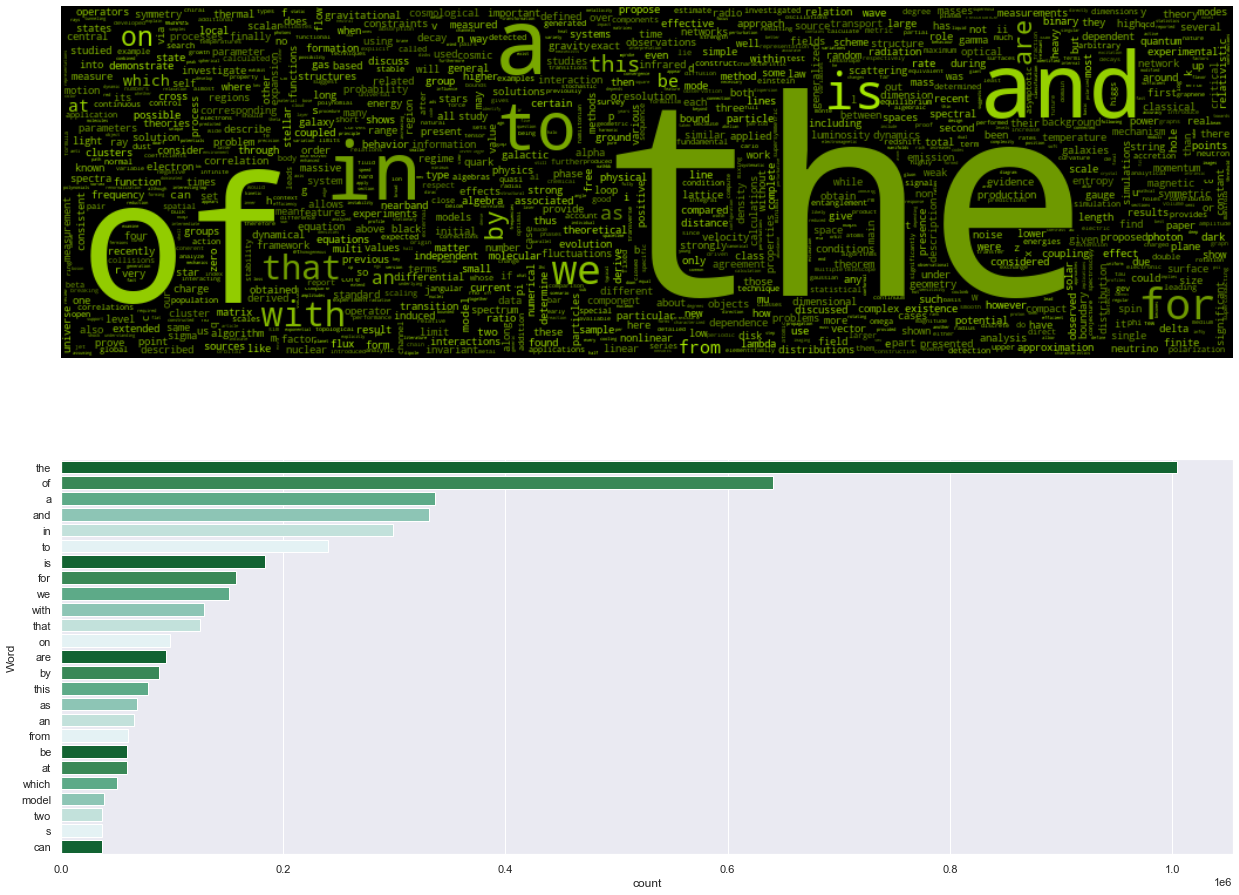

In [146]:
# plot 25 most frequent words including stop words
freq_words(arxivData_f_s['soup'], 25)

In [147]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sdeshpande/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [148]:
# stopwords-to compare text data with and without stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)
  
arxivData_f_s['soup'] = arxivData_f_s['soup'].apply(lambda x: remove_stopwords(x))

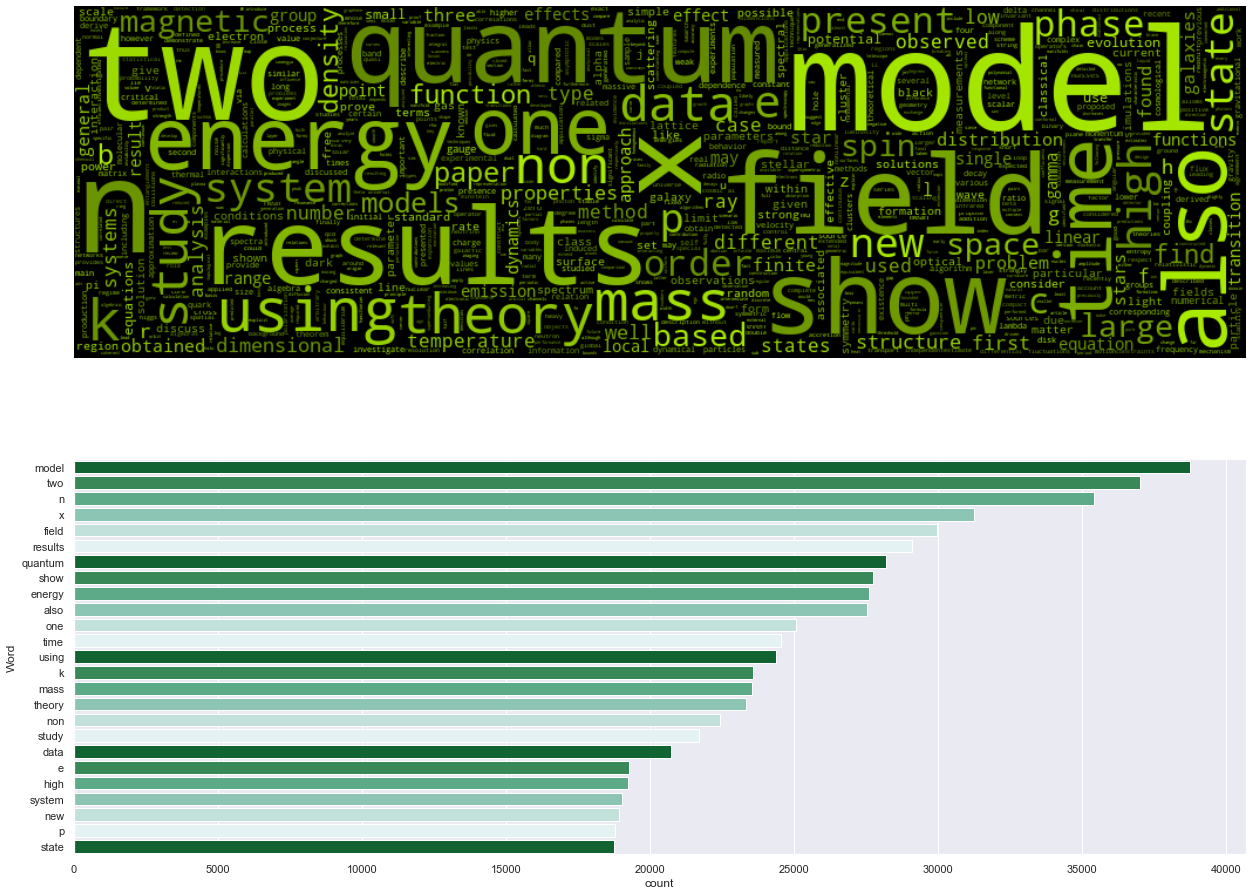

In [149]:
# plot 25 most frequent words without stopwords
freq_words(arxivData_f_s['soup'], 25)

In [150]:
arxivData_f_s['categories'] = arxivData_f_s['categories'].apply(lambda x: x.split(" "))

AttributeError: 'list' object has no attribute 'split'

In [ ]:
# get all genre tags in a list
all_tags = sum(arxivData_f_s['categories'],[])
len(set(all_tags))

In [ ]:
all_tags = nltk.FreqDist(all_tags)
all_tags_df = pd.DataFrame({'Tag': list(all_tags.keys()), 'Count': list(all_tags.values())})

In [ ]:
sorted_tags = all_tags_df.sort_values(by='Count', ascending=False)
sorted_tags.head(7)

In [ ]:
g = all_tags_df.nlargest(columns="Count", n = 25) 
plt.figure(figsize=(12,15))
ax = sns.barplot(data=g, x= "Count", y = "Tag")
ax.set(ylabel = 'Tags')
plt.show()

In [ ]:
text = " ".join(review for review in g.Tag)
wordcloud = WordCloud(width=1000, height=500,max_font_size=200).generate(text)

plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis("off")
plt.show()

In [ ]:
text = " ".join(review for review in arxivData_f_s.clean_title)
wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='magma').generate(text)

plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation='spline36')
plt.axis("off")
plt.show()

In [ ]:
text = " ".join(review for review in arxivData_f_s.clean_abstract)
wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='magma').generate(text)

plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation='spline36')
plt.axis("off")
plt.show()

In [ ]:
wordcloud.to_file("/Users/sdeshpande/Desktop/text_based_scripts_and_data/first_review.png")

In [ ]:
# Lemmatization process
'''
Words in the third person are changed to first person and verbs in past and future tenses are changed into the present by the 
lemmatization process. 
'''
lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
    # tokenization to ensure that punctuation is caught as its own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    lem = [lemmatizer.lemmatize(t) for t in filtered_tokens]
    return lem

In [ ]:
# Defining a Count Vectorizer object
count_vec = CountVectorizer(stop_words='english', max_features=10000)
# Defining a TF-IDF Vectorizer
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), tokenizer=tokenize_and_lemmatize, max_features=10000, use_idf=True)

In [ ]:
mb = MultiLabelBinarizer()
mb.fit(arxivData_f_s['categories'])

y = mb.transform(arxivData_f_s['categories'])

In [ ]:
y_train = y[:80000]
y_test = y[80000:100000]

In [ ]:
X_train = arxivData_f_s['soup'][:80000]
X_test = arxivData_f_s['soup'][80000:100000]

In [ ]:
# Tf-Idf transformation 
xtrain_tfidf = tfidf_vec.fit_transform(X_train)
xtest_tfidf = tfidf_vec.transform(X_test)
xtrain_tfidf.shape

In [ ]:
# Count Vectorizer transformation
xtrain_cv = count_vec.fit_transform(X_train)
xtest_cv = count_vec.transform(X_test)

In [ ]:
xtrain_cv.shape

In [ ]:
# to hold model's results
evaluation_list=[]

# Logistic Regression

In [94]:
log_reg = LogisticRegression()
oneVsRest = OneVsRestClassifier(log_reg)
oneVsRest.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [95]:
y_pred = oneVsRest.predict(xtest_tfidf)

def get_performance(y_test, y_pred):
    # Evaluate Performance
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')
    return accuracy, precision, recall, f1score

# Performance metrics
accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Logistic Reg.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Logistic Reg.: % 40.3
Precision : 0.8337034452128672
Recall    : 0.43835068054443554
F1-score   : 0.5745895008417692


In [96]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'Logistic Regression'),
    ('Test Accuracy', round(accuracy, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2))
     ]))

In [97]:
mb.inverse_transform(y_pred)[16]

('cs.CC', 'cs.LO')

# Multinomial Naive Bayes

In [98]:
nbayes = MultinomialNB()
oneVsRest_nb = OneVsRestClassifier(nbayes)
oneVsRest_nb.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=MultinomialNB())

In [99]:
y_pred = oneVsRest_nb.predict(xtest_tfidf)

# Performance metrics
accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Logistic Reg.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Logistic Reg.: % 32.7
Precision : 0.7007555882044286
Recall    : 0.4455230851347745
F1-score   : 0.5447240690133377


In [100]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'MultinomialNB'),
    ('Test Accuracy', round(accuracy, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2))
     ]))

In [102]:
mb.inverse_transform(y_pred)[16]

()

# Linear SVC

In [103]:
linear_svc = LinearSVC()
oneVsRest_svc = OneVsRestClassifier(linear_svc)
oneVsRest_svc.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=LinearSVC())

In [104]:
y_pred = oneVsRest_svc.predict(xtest_tfidf)

# Performance metrics
accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Logistic Reg.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Logistic Reg.: % 45.54
Precision : 0.7861693785532249
Recall    : 0.5351281024819856
F1-score   : 0.6368003175863438


In [105]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'LinearSVC'),
    ('Test Accuracy', round(accuracy, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2))
     ]))

In [106]:
mb.inverse_transform(y_pred)[16]

('cs.AI', 'cs.CC', 'cs.LO')

# Random Forest

In [109]:
# rforest = RandomForestClassifier(n_estimators=100)
# oneVsRest_rf = OneVsRestClassifier(rforest)
# oneVsRest_rf.fit(xtrain_tfidf, y_train)

In [110]:
# y_pred = oneVsRest_rf.predict(xtest_tfidf)

# # Performance metrics
# accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
# print(f'Test Accuracy Score of Basic Logistic Reg.: % {accuracy}')
# print(f'Precision : {precision}')
# print(f'Recall    : {recall}')
# print(f'F1-score   : {f1score}')

In [111]:
# # Add performance parameters to list
# evaluation_list.append(dict([
#     ('Model', 'RandomForestClassifier'),
#     ('Test Accuracy', round(accuracy, 2)),
#     ('Precision', round(precision, 2)),
#     ('Recall', round(recall, 2)),
#     ('F1', round(f1score, 2))
#      ]))

In [112]:
results = pd.DataFrame(data=evaluation_list)
results = results[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
results = results.sort_values(by='Test Accuracy', ascending=False)
results = results.set_index('Model')
results

,Test Accuracy,Precision,Recall,F1
Model,,,,
LinearSVC,45.54,0.79,0.54,0.64
Logistic Regression,40.30,0.83,0.44,0.57
MultinomialNB,32.70,0.70,0.45,0.54


# Optimization-GridSearch

In [113]:
param = {'estimator__penalty':['l1', 'l2'], 'estimator__C':[0.001, 0.01, 1, 10]}

In [114]:
oneVsRest.get_params().keys()

dict_keys(['estimator__C', 'estimator__class_weight', 'estimator__dual', 'estimator__fit_intercept', 'estimator__intercept_scaling', 'estimator__l1_ratio', 'estimator__max_iter', 'estimator__multi_class', 'estimator__n_jobs', 'estimator__penalty', 'estimator__random_state', 'estimator__solver', 'estimator__tol', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_jobs'])

In [116]:
# GridSearchCV
kf=KFold(n_splits=10, shuffle=True, random_state=55)
lr_grid = GridSearchCV(oneVsRest, param_grid = param, cv = kf, scoring='f1_micro', n_jobs=-1)
lr_grid.fit(xtrain_tfidf, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=55, shuffle=True),
             estimator=OneVsRestClassifier(estimator=LogisticRegression()),
             n_jobs=-1,
             param_grid={'estimator__C': [0.001, 0.01, 1, 10],
                         'estimator__penalty': ['l1', 'l2']},
             scoring='f1_micro')

In [117]:
# examine the best model
print(lr_grid.best_score_)
print(lr_grid.best_params_)
print(lr_grid.best_estimator_)

0.6296316279507099
{'estimator__C': 10, 'estimator__penalty': 'l2'}
OneVsRestClassifier(estimator=LogisticRegression(C=10))


In [118]:
# Optimized Logistic Regression Model
log_reg = LogisticRegression(C=10, penalty='l2')
ovr = OneVsRestClassifier(log_reg)
ovr.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=10))

In [119]:
# performance metrics of the optimized model
y_pred = ovr.predict(xtest_tfidf)

accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Logistic Reg.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Logistic Reg.: % 44.34
Precision : 0.774198250728863
Recall    : 0.5315252201761409
F1-score   : 0.6303109423213862


In [120]:
# Inference funct to handle new data that will come in the future
def infer_tags(text):
    text = clean_text(text)
    text = remove_stopwords(text)
    text_vec = tfidf_vec.transform([text])
    y_pred = ovr.predict(text_vec)
    return mb.inverse_transform(y_pred)

In [121]:
for i in range(10):
    sp = X_test.sample(1).index[0]
    print("Title: ", arxivData_f_s['title'][sp], "\nPredicted tag: ", infer_tags(X_test[sp])), print("Actual tag: ",arxivData_f_s['categories'][sp], "\n")

Title:  Coupling strength estimation for spin chains despite restricted access 
Predicted tag:  [()]
Actual tag:  ['quant-ph'] 

Title:  Universal features and tail analysis of the order-parameter distribution
  of the two-dimensional Ising model: An entropic sampling Monte Carlo study 
Predicted tag:  [('cond-mat.stat-mech',)]
Actual tag:  ['cond-mat.stat-mech'] 

Title:  Symmetry Analysis of Barotropic Potential Vorticity Equation 
Predicted tag:  [('math-ph', 'math.MP')]
Actual tag:  ['math-ph', 'math.MP', 'physics.flu-dyn'] 

Title:  Two component dark matter 
Predicted tag:  [('astro-ph', 'gr-qc', 'hep-ph')]
Actual tag:  ['hep-ph', 'astro-ph'] 

Title:  Lorentz Covariance and the Dimensional Crossover of 2d-Antiferromagnets 
Predicted tag:  [('cond-mat.str-el',)]
Actual tag:  ['cond-mat.mes-hall'] 

Title:  Delta-baryon electromagnetic form factors in lattice QCD 
Predicted tag:  [('hep-lat', 'hep-ph')]
Actual tag:  ['hep-lat'] 

Title:  Comment on 'Evolution of the unidirectional

# Article Recommendation Engine

# Recommender based on summary

In [151]:
arxivData_f_s['clean_abstract'].head()

0    a fully differential calculation in perturbati...
1    we describe a new algorithm the k ell pebble g...
2    the evolution of earth moon system is describe...
3    we show that a determinant of stirling cycle n...
4    in this paper we show how to compute the lambd...
Name: clean_abstract, dtype: object

In [152]:
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), tokenizer=tokenize_and_lemmatize, max_features=100, use_idf=True)

In [153]:
# TfIdf matrix transformation on clean_summary column
tfidf_matrix = tfidf_vec.fit_transform(arxivData_f_s['clean_abstract'][:20000])
# Compute the cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [129]:
indices = pd.Series(arxivData_f_s.index, index=arxivData_f_s['title']).drop_duplicates()

In [130]:
def get_recommendations(title, similarity):
    
    idx = indices[title]
    # pairwsie similarity scores
    sim_scores = list(enumerate(similarity[idx]))
    # sorting
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]

    article_indices = [i[0] for i in sim_scores]
    # Return the top 10 most related articles
    return arxivData_f_s[['title']].iloc[article_indices]

In [131]:
get_recommendations('Sparsity-certifying Graph Decompositions', cosine_sim)

,title
17,In quest of a generalized Callias index theorem
44,Evolution of solitary waves and undular bores ...
60,Intersection Bodies and Generalized Cosine Tra...
64,Littlewood-Richardson polynomials
68,Dynamical Objects for Cohomologically Expandin...
97,Sparsely-spread CDMA - a statistical mechanics...
98,On Ando's inequalities for convex and concave ...
136,"Topological defects, geometric phases, and the..."
180,Genetic Optimization of Photonic Bandgap Struc...
188,Monoid generalizations of the Richard Thompson...


# Recommender based on title, author, and category

In [157]:
arxivData_f_s.head()

,authors_parsed,title,categories,abstract,clean_title,clean_abstract,soup
0,"Balázs C. , Berger E. L. , Nadolsky P. M. , Yu...",Calculation of prompt diphoton production cros...,[hep-ph],A fully differential calculation in perturba...,calculation of prompt diphoton production cros...,a fully differential calculation in perturbati...,calculation prompt diphoton production cross s...
1,"Streinu Ileana , Theran Louis",Sparsity-certifying Graph Decompositions,"[math.CO, cs.CG]","We describe a new algorithm, the $(k,\ell)$-...",sparsity certifying graph decompositions,we describe a new algorithm the k ell pebble g...,sparsity certifying graph decompositionswe des...
2,Pan Hongjun,The evolution of the Earth-Moon system based o...,[physics.gen-ph],The evolution of Earth-Moon system is descri...,the evolution of the earth moon system based o...,the evolution of earth moon system is describe...,evolution earth moon system based dark matter ...
3,Callan David,A determinant of Stirling cycle numbers counts...,[math.CO],We show that a determinant of Stirling cycle...,a determinant of stirling cycle numbers counts...,we show that a determinant of stirling cycle n...,determinant stirling cycle numbers counts unla...
4,"Abu-Shammala Wael , Torchinsky Alberto",From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,"[math.CA, math.FA]",In this paper we show how to compute the $\L...,from dyadic lambda alpha to lambda alpha,in this paper we show how to compute the lambd...,dyadic lambda alpha lambda alphain paper show ...


In [155]:
def get_string(test_list):
    res = [' '.join(ele) for ele in test_list] 
    return ", ".join(res)

In [156]:
arxivData_f_s['authors_parsed'] = arxivData_f_s['authors_parsed'].apply(lambda x: get_string(x))

In [158]:
# convert all strings to lower case & strip names of spaces
def clean_lists(text):
    if isinstance(text, list):
        return [str.lower(i.replace(" ", "")) for i in text]
    else:
        if isinstance(text, str):
            return str.lower(text.replace(" ", ""))
        else:
            return ''

features = ['categories', 'authors_parsed']
for feature in features:
    arxivData_f_s[feature] = arxivData_f_s[feature].apply(clean_lists)

In [159]:
# create soup to vectorization process
def create_soup(text):
    return ' '.join(text['categories']) + ' ' + ' '.join(text['authors_parsed']) + ' ' + ' '.join(text['clean_title'])

arxivData_f_s['soup2'] = arxivData_f_s.apply(create_soup, axis=1)

In [162]:
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), tokenizer=tokenize_and_lemmatize, max_features=10000, use_idf=True)

In [163]:
# CountVectorizer object's defined at the beginning of Part 3-text mining alg. section
count_matrix = count_vec.fit_transform(arxivData_f_s['soup2'][:20000]) 
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [171]:
arxivData_f_s['title'][50]

'Visualizing Teleportation'

In [169]:
get_recommendations('Fermionic superstring loop amplitudes in the pure spinor formalism', cosine_sim2)

,title
17,In quest of a generalized Callias index theorem
51,Quantum Field Theory on Curved Backgrounds. II...
63,Nilpotent symmetry invariance in the superfiel...
65,Lagrangian quantum field theory in momentum pi...
82,Why there is something rather than nothing (ou...
84,A Universality in PP-Waves
100,The birth of string theory
120,Meta-Stable Brane Configuration of Product Gau...
139,Entanglement entropy of two-dimensional Anti-d...
165,Supersymmetry breaking metastable vacua in run...


In [172]:
get_recommendations('Visualizing Teleportation', cosine_sim2)

,title
1318,Using conceptual metaphor and functional gramm...
1853,Teaching for transfer
7998,A small tabletop experiment for a direct measu...
9981,Reaction Time of a Group of Physics Students
10851,A Research-Based Curriculum for Teaching the P...
11403,Newton's 2nd Law and the Physics of Dance
14711,Why we should teach the Bohr model and how to ...
14853,Travaux pratiques sur les r\'eseaux locaux de ...
16276,A Global View of Cognitive Structure and Impli...
17910,On the need to enhance physical insight via ma...
